In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/assignloo/dataset/content/dataset/Rook-resize/00000137_resized.jpg
/kaggle/input/assignloo/dataset/content/dataset/Rook-resize/Rook-resize_original_00000118_resized.jpg_88f2a51b-917c-4f6f-99d8-7a032aacb5ee.jpg
/kaggle/input/assignloo/dataset/content/dataset/Rook-resize/00000010_resized.jpg
/kaggle/input/assignloo/dataset/content/dataset/Rook-resize/Rook-resize_original_00000168_resized.jpg_877e674f-ecb2-475d-9453-4cac10ecce11.jpg
/kaggle/input/assignloo/dataset/content/dataset/Rook-resize/Rook-resize_original_00000078_resized.jpg_b93db770-de87-402b-8d3e-832822eb434e.jpg
/kaggle/input/assignloo/dataset/content/dataset/Rook-resize/Rook-resize_original_00000082_resized.jpg_970b4ec6-81a0-4bf4-93e6-56a91765a6d1.jpg
/kaggle/input/assignloo/dataset/content/dataset/Rook-resize/00000067_resized.jpg
/kaggle/input/assignloo/dataset/content/dataset/Rook-resize/Rook-resize_original_00000016_resized.jpg_e439e2bd-c8c8-48e9-a341-2a7adcdf405b.jpg
/kaggle/input/assignloo/dataset/content/da

## Name -:  Prabhat Singh 
## Reg No -: 19BLC1027 


## Looper Assignment For DataScience 

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import  random
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
import PIL
%matplotlib inline

## Defining Batch Size, Image Size which will be used in all the models while training

In [ ]:
batch_size = 4
img_height = 224
img_width = 224

* ## Loading the Test and Train Data. 
* ### The Test Data was manually separated from the given dataset and the similar structure was created like the initial given dataset 
* ### For the Train Dataset augmentation and preprocessing was done and after it was loaded in the kaggle , you can find the dataset for train and      test both in the github 

In [ ]:
testdir='../input/assignloo/TestAssign/TestAssign'
datadir='../input/assignloo/dataset/content/dataset'

## Here we are using image_dataset_from_directory  api of tensorflow to directly take the dataset from the directory and do the required labelling and image resizing  , and we are using **0.15** of the training dataset for the validation 

In [ ]:
### The augmentation code used is as follows, this augmentation was done on google collab .
# import shutil 
# import pathlib 
# !pip install Augmentor
# import Augmentor 

## Augmentor library creates the augmentation and it can save the augmentated images easily hence it was used 

* ### Here's how we created the similar structure as the given original dataset 
---
```
for f in os.listdir(datadir):
   path = os.path.join("/content/dataset", f)
   os.mkdir(path)
 ```
---

*  ### This is the code snippet that was used to create the augmentation and save it , the datadir represents the original dataset folder path .
*  ### The Output directory is the directory where the augmented images are saved .
*  ### The probability in each of the augmentation represents the probability that , that particular augmentation would be performed on the original image 
*  ### p.sample(n) tell the pipeline to create 250 augmented images from the source folder and save it in the output folder .
*  ### We are looping through the main directory and creating the augmentated images for each folder and maintaining the same structure as given in the original dataset
---
``` 
for f in os.listdir(datadir): 
  path = os.path.join(datadir, f)
  p=Augmentor.Pipeline(source_directory=path,output_directory=f'/content/dataset/{f}')
  p.rotate90(probability=0.5)
  p.flip_left_right(probability=0.8)
  p.flip_top_bottom(probability=0.3)
  p.shear(probability=0.64,max_shear_left=15,max_shear_right=15)
  p.random_distortion(0.76,grid_height=5,grid_width=7,magnitude=4)
  p.histogram_equalisation(0.46)
  p.random_brightness(0.58,0.2,0.7)
  p.skew(0.67,0.5)
  p.rotate_random_90(0.89)
  p.greyscale(0.66)
  p.sample(250)
```  
---

### After the augmentation we have copied the original given images as well from the directory to the created folder 
---
```
 for f in os.listdir(datadir):
    source=os.path.join(datadir,f)
    destination=os.path.join('/content/dataset',f)
    for s in os.listdir(f'{datadir}/{f}'):
         shutil.copy2(f'{source}/{s}', f'{destination}/{s}')
```

In [ ]:
train_data=tf.keras.preprocessing.image_dataset_from_directory(
    datadir,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=batch_size,
    image_size=(img_height,img_width),
    seed=1337,
    validation_split=0.15,
    subset="training",)
train_data.class_names


Found 1865 files belonging to 5 classes.
Using 1586 files for training.


2022-11-13 09:17:53.390949: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-13 09:17:53.487627: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-13 09:17:53.488467: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-13 09:17:53.491108: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

['Queen-Resized',
 'Rook-resize',
 'bishop_resized',
 'knight-resize',
 'pawn_resized']

In [ ]:
val_data=tf.keras.preprocessing.image_dataset_from_directory(
    datadir,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=batch_size,
    image_size=(img_height,img_width),
    seed=1337,
    validation_split=0.15,
    subset="validation",)
val_data.class_names

Found 1865 files belonging to 5 classes.
Using 279 files for validation.


['Queen-Resized',
 'Rook-resize',
 'bishop_resized',
 'knight-resize',
 'pawn_resized']

## Loading the test dataset from the test directory , **The training dataset does not contain a single image from the test dataset as test dataset was manually created**

In [ ]:
test_data=tf.keras.preprocessing.image_dataset_from_directory(
    testdir,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=batch_size,
    image_size=(img_height,img_width),
    shuffle=True,
    seed=1337,
    interpolation="bilinear",)
test_data.class_names

Found 36 files belonging to 5 classes.


['Queen-Resized',
 'Rook-resize',
 'bishop_resized',
 'knight-resize',
 'pawn-resized']

## The ClassNames in the given dataset are as follows :

In [ ]:
classnames=train_data.class_names
classnames

['Queen-Resized',
 'Rook-resize',
 'bishop_resized',
 'knight-resize',
 'pawn_resized']

### The Below snippet tells number of images in each category for the training and the validation category

In [ ]:
datasample_dict={}
for i in classnames:
  print(i,end=" ")
  val=len(os.listdir(f"{datadir}/{i}"))
  print(val)
  datasample_dict.update({i:val})

Queen-Resized 357
Rook-resize 381
bishop_resized 385
knight-resize 416
pawn_resized 326


### We have total of 1865  images for training and validation 

In [ ]:
data_len=np.sum(list(datasample_dict.values()))
data_len

1865

## Here we have taken 2 batches from the train dataset and plotting them to see the sample of how the train dataset looks like

2022-11-13 09:18:04.950392: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


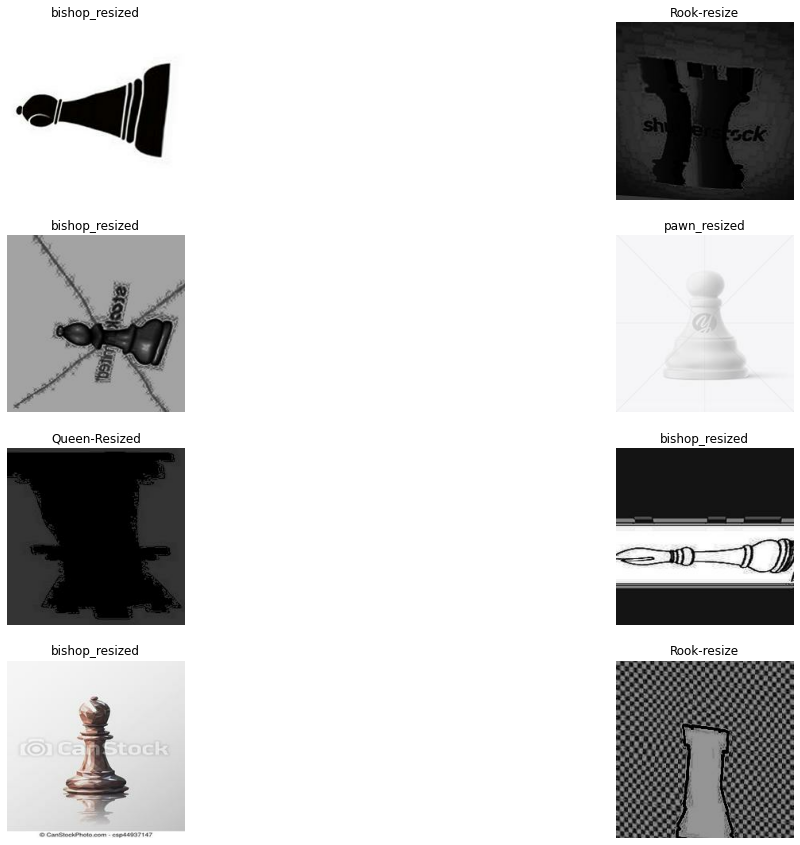

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
j=-1
for images, labels in train_data.take(2):
  labels=tf.cast(labels,tf.uint8)
  j+=1
  for i in range(4):
    if j==0:  
        ax = plt.subplot(4, 2, i + 1) 
    else :
       ax = plt.subplot(4, 2, i + 5)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(classnames[np.argmax(labels[i])])
    plt.axis("off")


## A simple rescaling is done to change all the colour images and to make sure they fall in the same range 

In [ ]:
def preprocess(train_data, val_data,test_data):
    data_preprocess = keras.Sequential(
            name="data_preprocess",
            layers=[
                  layers.Rescaling(1.0/255),
            ]
        )
    train_ds = train_data.map(lambda x, y: (data_preprocess(x), y), num_parallel_calls=tf.data.AUTOTUNE)
    val_ds = val_data.map(lambda x, y: (data_preprocess(x), y), num_parallel_calls=tf.data.AUTOTUNE)
    test_ds=test_data.map(lambda x, y: (data_preprocess(x), y), num_parallel_calls=tf.data.AUTOTUNE)
    return train_ds,val_ds,test_ds

In [ ]:
train_ds, val_ds,test_ds= preprocess(train_data, val_data,test_data)

### The below snippet is used to change the learning rate during the training , both reduceLRonPlateau and lr_scheduler was used one by one and finally lr_scheduler gave the better results

In [ ]:
initial_learning_rate = 0.001

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=10000, decay_rate=0.96, staircase=True
)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lr_schedule) 

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=5, min_lr=0.0000001,mode='min')

## These are the metrics that are used for all the networks in training

In [ ]:
METRICS = [
  tf.keras.metrics.CategoricalAccuracy(),
  tf.keras.metrics.Precision(name="precision"),
  tf.keras.metrics.Recall(name="recall"),
  tf.keras.metrics.AUC(name='auc'),
  ]

## Every Network was trained for 100 epochs and the best weights were saved using checkpoint 

In [ ]:
checkpoint_vgg_cb = tf.keras.callbacks.ModelCheckpoint("./vggnet_model.h5", save_best_only=True)

# VGG19  

* ## Vgg19 pretrained model was used, where we are using the same weights as the imagenet , although we have kept all the layers non trainable except the last 5 (this was done after number of iterations to find the best possible results in the given scenario) 
* ## After this a batchNormalization and dropout was used to avouid overfitting of the model .
* ## Finally last layer contains 5 units and softmax as the activation function as we are dealing with multiclass classification

In [ ]:
def build_vgg_model():

    vgg_model = tf.keras.applications.VGG19(
                include_top=False,
                weights="imagenet",
                input_shape = (224,224,3),
                pooling='max'
            )

    for layer in vgg_model.layers[:-5]:
        layer.trainable = False
    x = vgg_model.output   
    x=tf.keras.layers.BatchNormalization()(x)
    x=tf.keras.layers.Dropout(0.25)(x)
    output = tf.keras.layers.Dense(5, activation = 'softmax')(x)
    pretrained_model = tf.keras.Model(inputs = vgg_model.input, outputs = output)
    
    return pretrained_model

## Build the VGG Net model 

In [ ]:
finetuned_vggnet=build_vgg_model()

In [ ]:
finetuned_vggnet.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

## Compiling the model while taking categorical crossentropy as the loss for the multiclass classification

In [ ]:
finetuned_vggnet.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss="categorical_crossentropy",
  metrics=METRICS,
  )

### Training the net for 100 epochs with checkpoint and the lr_scheduler as the callbacks

In [ ]:
history_vggnet = finetuned_vggnet.fit(
  train_ds,
  epochs = 100,
  validation_data = val_ds,
  callbacks=[checkpoint_vgg_cb,lr_scheduler]
  )

Epoch 1/100
397/397 [==============================] - 12s 27ms/step - loss: 1.6998 - categorical_accuracy: 0.4635 - precision: 0.7508 - recall: 0.3247 - auc: 0.7741 - val_loss: 2.5416 - val_categorical_accuracy: 0.2186 - val_precision: 0.2194 - val_recall: 0.2186 - val_auc: 0.6159
Epoch 2/100
397/397 [==============================] - 10s 26ms/step - loss: 1.3400 - categorical_accuracy: 0.4483 - precision: 0.6238 - recall: 0.2541 - auc: 0.7571 - val_loss: 7.3286 - val_categorical_accuracy: 0.1935 - val_precision: 0.1935 - val_recall: 0.1935 - val_auc: 0.5557
Epoch 3/100
397/397 [==============================] - 10s 26ms/step - loss: 1.2534 - categorical_accuracy: 0.4887 - precision: 0.6682 - recall: 0.2781 - auc: 0.7900 - val_loss: 3.1262 - val_categorical_accuracy: 0.2115 - val_precision: 0.2125 - val_recall: 0.2079 - val_auc: 0.6377
Epoch 4/100
397/397 [==============================] - 10s 26ms/step - loss: 1.0243 - categorical_accuracy: 0.6179 - precision: 0.7240 - recall: 0.4830

# Plotting the performance of vggnet during training 
## Few Inferences are -:
*  ### The LR scheduler can be a bit more optimized so that the curves which are not smooth can be smooth and the sudden dips and peaks can be avoided 
*  ### Second thing that can be optimized is to change the number of layers freezed to reduce or increase the trainable parameters   
*  ### The auc ,precision and the recall are slowly reaching the stability, training them for a some more epoch may smoothen the curve .
*  ### The performance of the model on test dataset is shown below

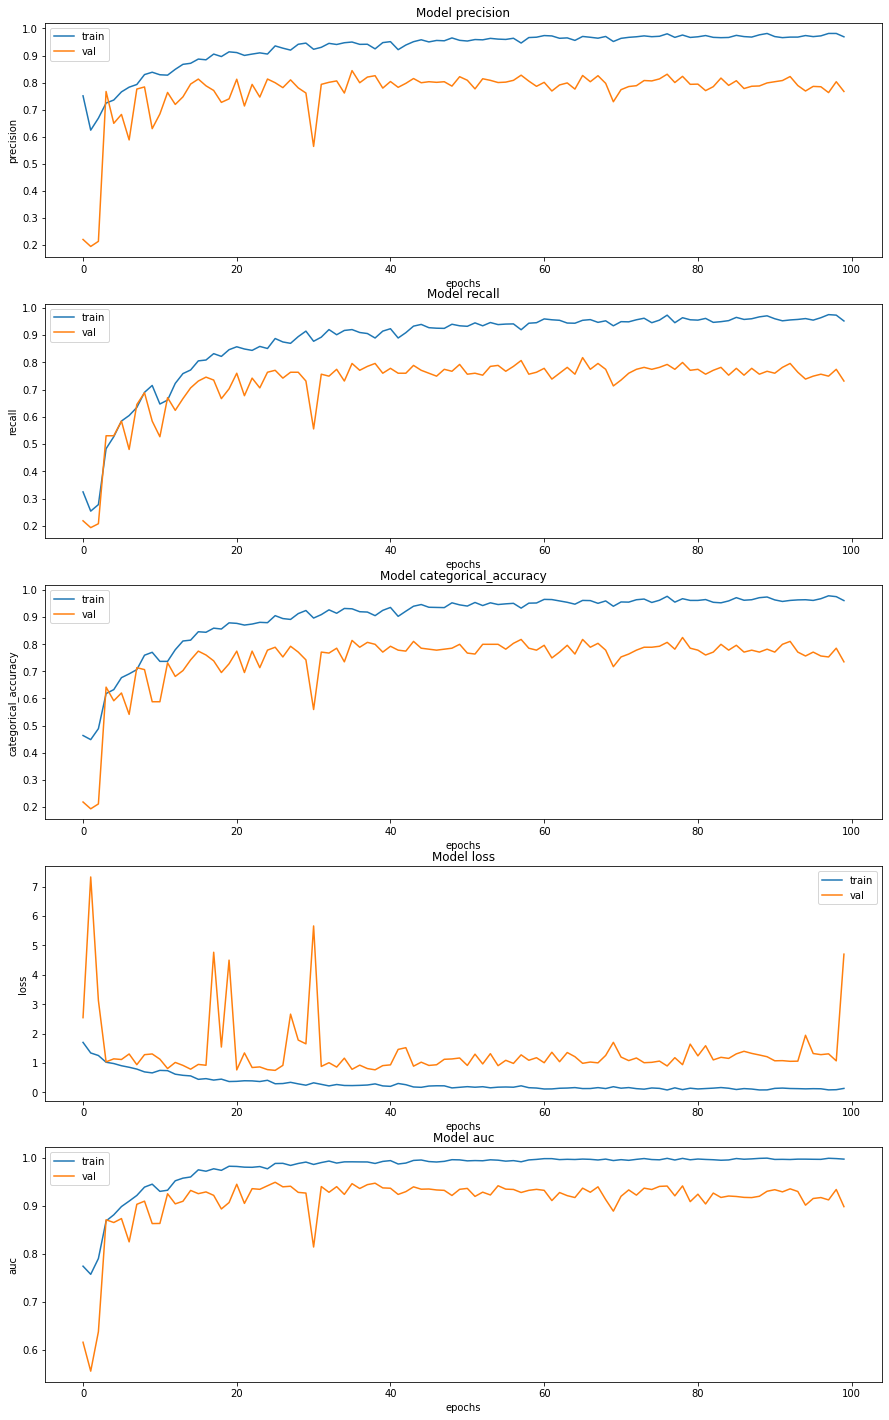

In [ ]:
fig, ax = plt.subplots(5, 1, figsize=(15, 25))
ax = ax.ravel()

for i, met in enumerate(["precision", "recall", "categorical_accuracy", "loss",'auc']):
    ax[i].plot(history_vggnet.history[met])
    ax[i].plot(history_vggnet.history["val_" + met])
    ax[i].set_title("Model {}".format(met))
    ax[i].set_xlabel("epochs")
    ax[i].set_ylabel(met)
    ax[i].legend(["train", "val"])

* ### As we can see that the loss for the latest weights after 100 epochs are 0.64 while the best weights give the loss as 0.4  .
* ### The  **auc** score is above 0.95 
* ### The model is having a balanced precision and recall ratio

In [ ]:
finetuned_vggnet.evaluate(test_ds,return_dict=True)

9/9 [==============================] - 0s 24ms/step - loss: 0.6410 - categorical_accuracy: 0.9167 - precision: 0.9143 - recall: 0.8889 - auc: 0.9604


{'loss': 0.6409915089607239,
 'categorical_accuracy': 0.9166666865348816,
 'precision': 0.9142857193946838,
 'recall': 0.8888888955116272,
 'auc': 0.9603587985038757}

In [ ]:
vgg_net=tf.keras.models.load_model('./vggnet_model.h5')
vgg_net.evaluate(test_ds,return_dict=True)

9/9 [==============================] - 1s 20ms/step - loss: 0.4882 - categorical_accuracy: 0.8333 - precision: 0.8788 - recall: 0.8056 - auc: 0.9774


{'loss': 0.4881972670555115,
 'categorical_accuracy': 0.8333333134651184,
 'precision': 0.8787878751754761,
 'recall': 0.8055555820465088,
 'auc': 0.9774306416511536}

In [ ]:
def plot_image(pred_array, true_label, img):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary) 
#   plt.imshow(img[i].numpy().astype("uint8"))
#   print(pred_array,true_label)
  predicted_label = tf.argmax(pred_array,axis=0)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.title(f"{class_names[true_label],int(true_label)}",color='green') 
  plt.xlabel("{} {:2.0f}% ".format(class_names[predicted_label],
                                100*np.max(pred_array),
                                ),
                                color=color)

## Model Prediction on random test images for VGG NET

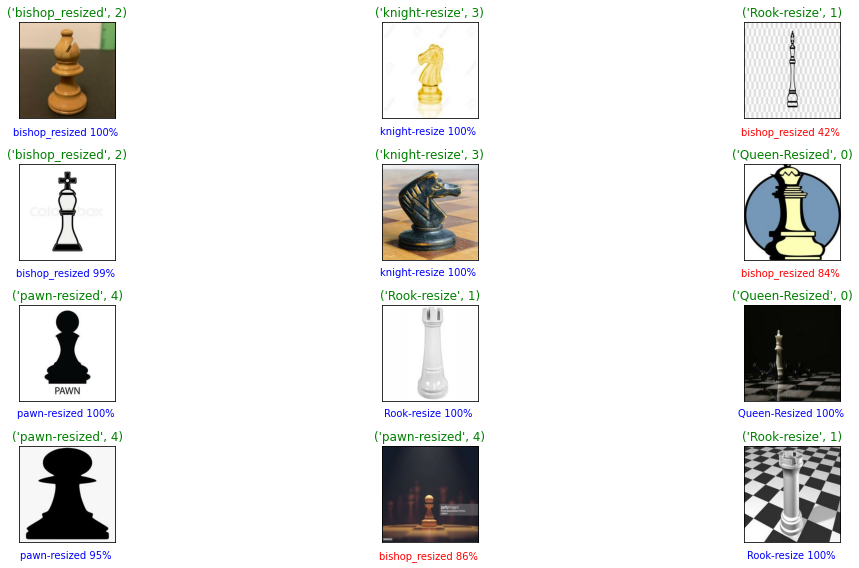

In [ ]:
images = []
true_categories = []
for i in test_ds.unbatch():
  images.append(i[0])
  true_categories.append(tf.argmax(i[1]))
y_pred=vgg_net.predict(tf.convert_to_tensor(images))
class_names = test_data.class_names
# Randomly sample 15 test images and plot it with their predicted labels, and the true labels.
indices = random.sample(range(len(images)), 12)
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 4
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(6*num_cols, 2*num_rows))
for i,index in enumerate(indices):
  plt.subplot(num_rows, num_cols, i+1)
  plot_image(y_pred[index], true_categories[index], images[index])

plt.tight_layout()
plt.show()

# DenseNet121

* ### Here we are again using the imagenet weights but the number of layers which are trainable are increased compared to VGG 
* ### Along with that few fully connected dense layer are also added  to it after numerous training and experimentation 
* ### GlobalAveragePooling was to reduce the number of parameters in the dense layer 

In [ ]:
def build_model_dense():
    
    densenet_model = tf.keras.applications.DenseNet121(
        weights ='imagenet',
        include_top = False,
        input_shape = (224,224,3)
    )
   
    for layer in densenet_model.layers[:-8]:
        layer.trainable = False
    x = densenet_model.output   
    x = tf.keras.layers.Dense(256, activation = "relu")(x) 
    x=tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(128, activation = "relu")(x)
    x=tf.keras.layers.BatchNormalization()(x)
    x=tf.keras.layers.Dropout(0.5)(x)
    output = tf.keras.layers.Dense(5, activation = 'softmax')(x)
    pretrained_model = tf.keras.Model(inputs = densenet_model.input, outputs = output)
    return pretrained_model

In [ ]:
finetuned_densenet = build_model_dense()

29097984/29084464 [==============================] - 0s 0us/step


In [ ]:
finetuned_densenet.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_7[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
checkpoint_cb_dense = tf.keras.callbacks.ModelCheckpoint("./densenet_model.h5", save_best_only=True)

In [ ]:
finetuned_densenet.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss="categorical_crossentropy",
  metrics=METRICS,
  )
history_densenet = finetuned_densenet.fit(
  train_ds,
  epochs = 100,
  validation_data = val_ds,
  callbacks=[lr_scheduler,checkpoint_cb_dense]
  )

Epoch 1/100
397/397 [==============================] - 22s 37ms/step - loss: 1.8035 - categorical_accuracy: 0.4445 - precision: 0.4934 - recall: 0.3818 - auc: 0.7459 - val_loss: 1.1514 - val_categorical_accuracy: 0.5771 - val_precision: 0.6535 - val_recall: 0.5341 - val_auc: 0.8559
Epoch 2/100
397/397 [==============================] - 13s 32ms/step - loss: 1.2699 - categorical_accuracy: 0.5441 - precision: 0.6052 - recall: 0.4552 - auc: 0.8189 - val_loss: 0.8554 - val_categorical_accuracy: 0.7025 - val_precision: 0.7398 - val_recall: 0.6523 - val_auc: 0.9131
Epoch 3/100
397/397 [==============================] - 13s 34ms/step - loss: 1.0345 - categorical_accuracy: 0.6097 - precision: 0.6691 - recall: 0.5303 - auc: 0.8737 - val_loss: 0.8230 - val_categorical_accuracy: 0.7133 - val_precision: 0.7451 - val_recall: 0.6810 - val_auc: 0.9227
Epoch 4/100
397/397 [==============================] - 13s 33ms/step - loss: 0.9281 - categorical_accuracy: 0.6595 - precision: 0.7206 - recall: 0.5902

## Inferences from the training of the densenet

*  ### The model is having it's curve gettting smooth as it is approaching 100 epochs 
* ### The number of spikes in the curve indicate that the learning rate scheduler can be optimized more 
* ### Also the number of trainable parameters  can be reduced to get more smoothening

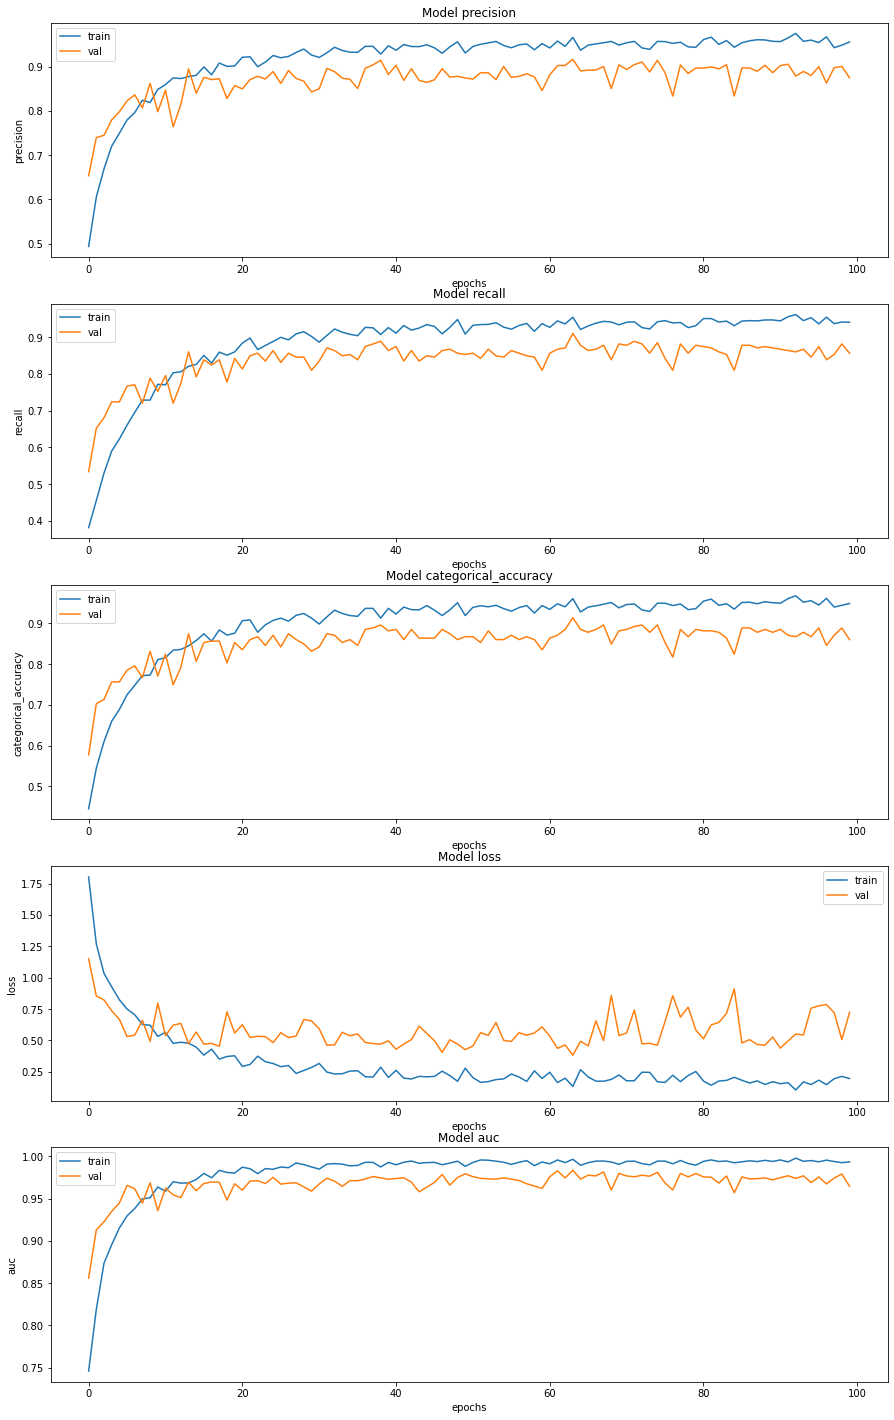

In [ ]:
fig, ax = plt.subplots(5, 1, figsize=(15, 25))
ax = ax.ravel()

for i, met in enumerate(["precision", "recall", "categorical_accuracy", "loss",'auc']):
    ax[i].plot(history_densenet.history[met])
    ax[i].plot(history_densenet.history["val_" + met])
    ax[i].set_title("Model {}".format(met))
    ax[i].set_xlabel("epochs")
    ax[i].set_ylabel(met)
    ax[i].legend(["train", "val"])

In [ ]:
finetuned_densenet.evaluate(test_ds,return_dict=True)

9/9 [==============================] - 0s 23ms/step - loss: 0.5971 - categorical_accuracy: 0.8611 - precision: 0.8611 - recall: 0.8611 - auc: 0.9627


{'loss': 0.5970742702484131,
 'categorical_accuracy': 0.8611111044883728,
 'precision': 0.8611111044883728,
 'recall': 0.8611111044883728,
 'auc': 0.962673544883728}

In [ ]:
dense_net=tf.keras.models.load_model('./densenet_model.h5')
dense_net.evaluate(test_ds,return_dict=True)

9/9 [==============================] - 2s 21ms/step - loss: 0.7368 - categorical_accuracy: 0.8333 - precision: 0.8571 - recall: 0.8333 - auc: 0.9501


{'loss': 0.7367829084396362,
 'categorical_accuracy': 0.8333333134651184,
 'precision': 0.8571428656578064,
 'recall': 0.8333333134651184,
 'auc': 0.9501349925994873}

## Model Prediction on random test images for DENSE NET

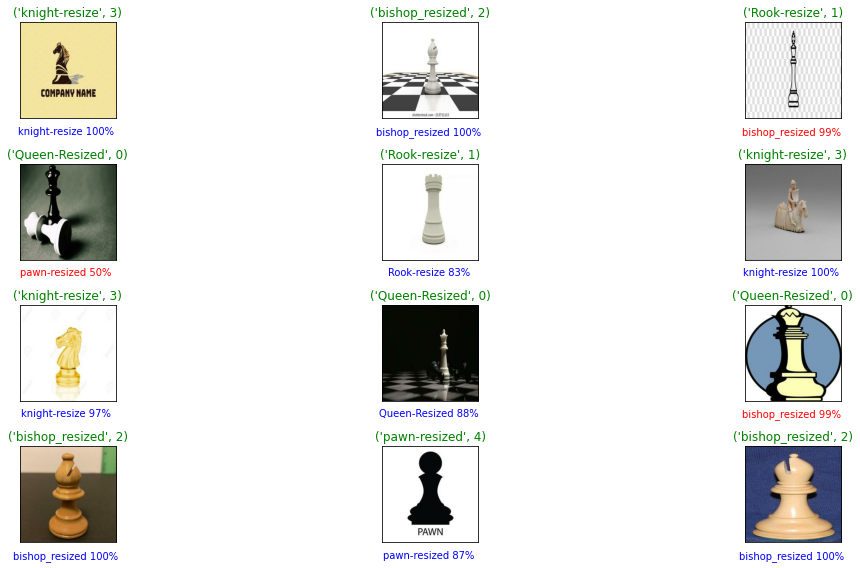

In [ ]:
images = []
true_categories = []
for i in test_ds.unbatch():
  images.append(i[0])
  true_categories.append(tf.argmax(i[1]))
y_pred=dense_net.predict(tf.convert_to_tensor(images))
class_names = test_data.class_names
# Randomly sample 15 test images and plot it with their predicted labels, and the true labels.
indices = random.sample(range(len(images)), 12)
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 4
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(6*num_cols, 2*num_rows))
for i,index in enumerate(indices):
  plt.subplot(num_rows, num_cols, i+1)
  plot_image(y_pred[index], true_categories[index], images[index])

plt.tight_layout()
plt.show()

# MobileNet V2
* ###  In the mobile net model, we are using imagenet weights with max pooling
* ### Along with this we have also made last 8 layers trainable 
* ### And all the batchnorm layers as well  , as they affected the training, thus after searching I got to know that the models containing batchnorm in them , those layers should be made trainable 
* ### Lastly dropout and the batchnorm is added to avoid overfitting

In [ ]:
def build_model_mobile():

    mobilenet_model = tf.keras.applications.MobileNetV2(
        weights ='imagenet',
        include_top = False,
        input_shape = (224,224,3),
        pooling='max'
    )
    for layer in mobilenet_model.layers[:-8]:
         if "BatchNormalization" in layer.__class__.__name__:
                layer.trainable = True
         else:
             layer.trainable = False
    x = mobilenet_model.output   
    x=tf.keras.layers.BatchNormalization()(x)
    x=tf.keras.layers.Dropout(0.25)(x)
    output = tf.keras.layers.Dense(5, activation = 'softmax')(x)
    pretrained_model = tf.keras.Model(inputs = mobilenet_model.input, outputs = output)
    
    return pretrained_model

In [ ]:
finetuned_mobilenet=build_model_mobile()

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
finetuned_mobilenet.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_8[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
____________________________________________________________________________________________

In [ ]:
checkpoint_cb_mobile= tf.keras.callbacks.ModelCheckpoint("mobilenet_model.h5", save_best_only=True)

In [ ]:
finetuned_mobilenet.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss="categorical_crossentropy",
  metrics=METRICS,
  )
history = finetuned_mobilenet.fit(
  train_ds,
  epochs = 100,
  validation_data = val_ds,
  callbacks=[lr_scheduler,checkpoint_cb_mobile]
  )

Epoch 1/100
397/397 [==============================] - 16s 28ms/step - loss: 1.6790 - categorical_accuracy: 0.4020 - precision: 0.4614 - recall: 0.2984 - auc: 0.7111 - val_loss: 8.9904 - val_categorical_accuracy: 0.2688 - val_precision: 0.2698 - val_recall: 0.2688 - val_auc: 0.5508


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/100
397/397 [==============================] - 11s 27ms/step - loss: 1.3837 - categorical_accuracy: 0.4735 - precision: 0.5609 - recall: 0.3632 - auc: 0.7763 - val_loss: 10.2485 - val_categorical_accuracy: 0.2903 - val_precision: 0.2935 - val_recall: 0.2903 - val_auc: 0.6052
Epoch 3/100
397/397 [==============================] - 10s 25ms/step - loss: 1.3142 - categorical_accuracy: 0.5076 - precision: 0.5661 - recall: 0.4023 - auc: 0.8004 - val_loss: 19.6454 - val_categorical_accuracy: 0.1864 - val_precision: 0.1864 - val_recall: 0.1864 - val_auc: 0.4941
Epoch 4/100
397/397 [==============================] - 11s 27ms/step - loss: 1.3025 - categorical_accuracy: 0.5517 - precision: 0.5944 - recall: 0.4704 - auc: 0.8203 - val_loss: 4.9833 - val_categorical_accuracy: 0.3513 - val_precision: 0.3529 - val_recall: 0.3441 - val_auc: 0.6407
Epoch 5/100
397/397 [==============================] - 10s 26ms/step - loss: 1.1594 - categorical_accuracy: 0.5914 - precision: 0.6532 - recall: 0.53

Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x7fcf2d8e1560>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/tensorflow/python/data/ops/iterator_ops.py", line 546, in __del__
    handle=self._handle, deleter=self._deleter)
  File "/opt/conda/lib/python3.7/site-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1264, in delete_iterator
    _ctx, "DeleteIterator", name, handle, deleter)
KeyboardInterrupt: 


397/397 [==============================] - 11s 26ms/step - loss: 0.9898 - categorical_accuracy: 0.6791 - precision: 0.7177 - recall: 0.6444 - auc: 0.9006 - val_loss: 0.9839 - val_categorical_accuracy: 0.6416 - val_precision: 0.7203 - val_recall: 0.6093 - val_auc: 0.8983
Epoch 14/100
397/397 [==============================] - 10s 26ms/step - loss: 0.9524 - categorical_accuracy: 0.6967 - precision: 0.7308 - recall: 0.6677 - auc: 0.9085 - val_loss: 1.0136 - val_categorical_accuracy: 0.6953 - val_precision: 0.7258 - val_recall: 0.6452 - val_auc: 0.9013
Epoch 15/100
397/397 [==============================] - 11s 27ms/step - loss: 0.9434 - categorical_accuracy: 0.6759 - precision: 0.7138 - recall: 0.6368 - auc: 0.9041 - val_loss: 0.8447 - val_categorical_accuracy: 0.7061 - val_precision: 0.7570 - val_recall: 0.6810 - val_auc: 0.9241
Epoch 16/100
397/397 [==============================] - 10s 26ms/step - loss: 0.8491 - categorical_accuracy: 0.7100 - precision: 0.7460 - recall: 0.6778 - auc: 0

# Inferences 
* ### Here as we can see from the below curves  that the model is slowly approaching the smoothening
* ### The auc and the loss curves have almost smoothen out and are approaching the train values slowly


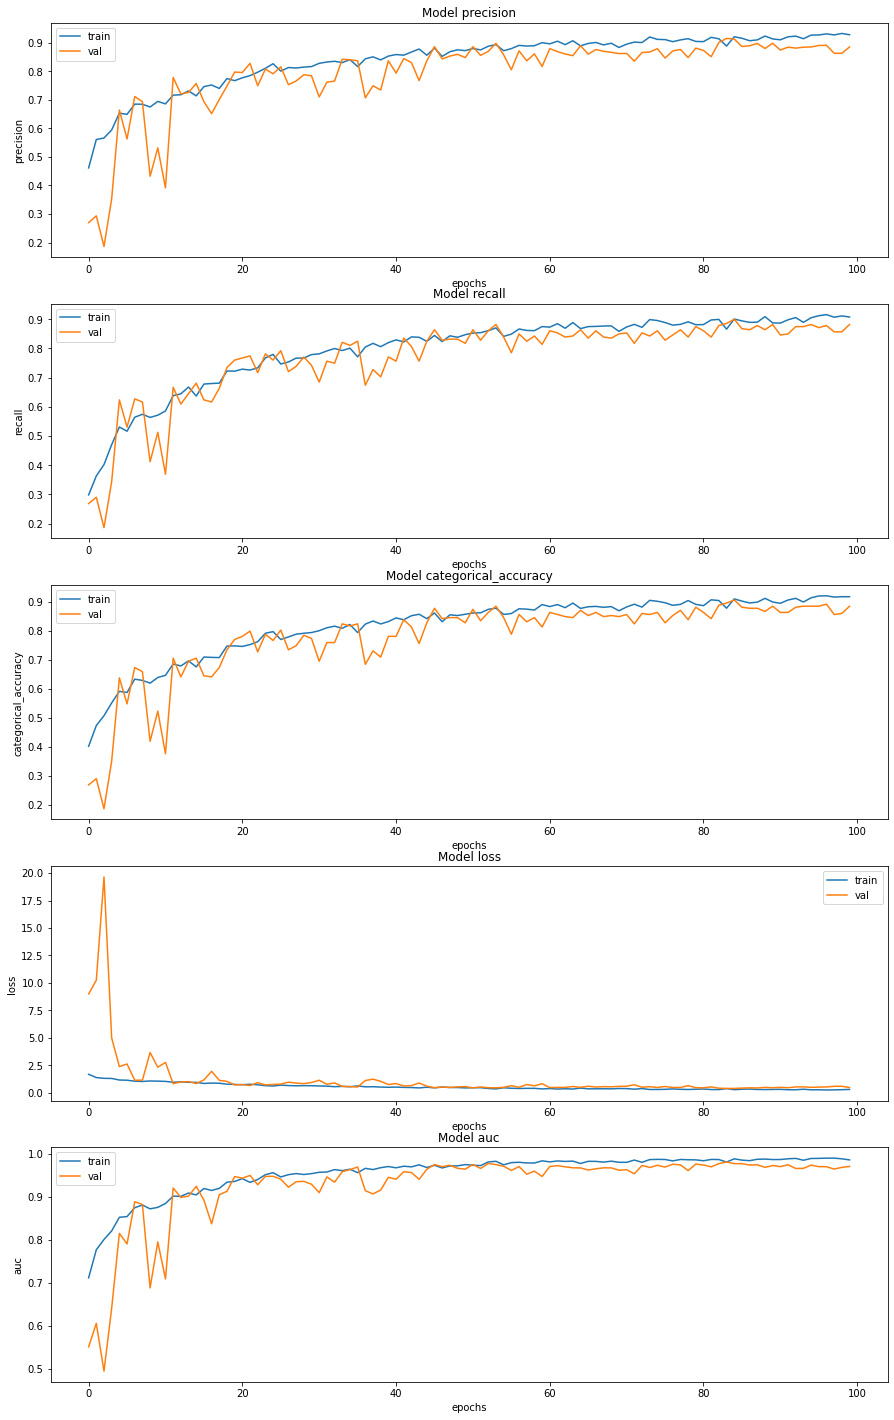

In [ ]:
fig, ax = plt.subplots(5, 1, figsize=(15, 25))
ax = ax.ravel()

for i, met in enumerate(["precision", "recall", "categorical_accuracy", "loss",'auc']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history["val_" + met])
    ax[i].set_title("Model {}".format(met))
    ax[i].set_xlabel("epochs")
    ax[i].set_ylabel(met)
    ax[i].legend(["train", "val"])

In [ ]:
mobilenet_model=tf.keras.models.load_model('./mobilenet_model.h5')

In [ ]:
finetuned_mobilenet.evaluate(test_ds,return_dict=True)

9/9 [==============================] - 0s 12ms/step - loss: 0.3231 - categorical_accuracy: 0.8889 - precision: 0.9143 - recall: 0.8889 - auc: 0.9900


{'loss': 0.32314667105674744,
 'categorical_accuracy': 0.8888888955116272,
 'precision': 0.9142857193946838,
 'recall': 0.8888888955116272,
 'auc': 0.9899691343307495}

In [ ]:
mobilenet_model.evaluate(test_ds,return_dict=True)

9/9 [==============================] - 1s 11ms/step - loss: 0.2055 - categorical_accuracy: 0.8889 - precision: 0.8889 - recall: 0.8889 - auc: 0.9953


{'loss': 0.2055281698703766,
 'categorical_accuracy': 0.8888888955116272,
 'precision': 0.8888888955116272,
 'recall': 0.8888888955116272,
 'auc': 0.9952739477157593}

## Model Prediction on random test images for MobileNet

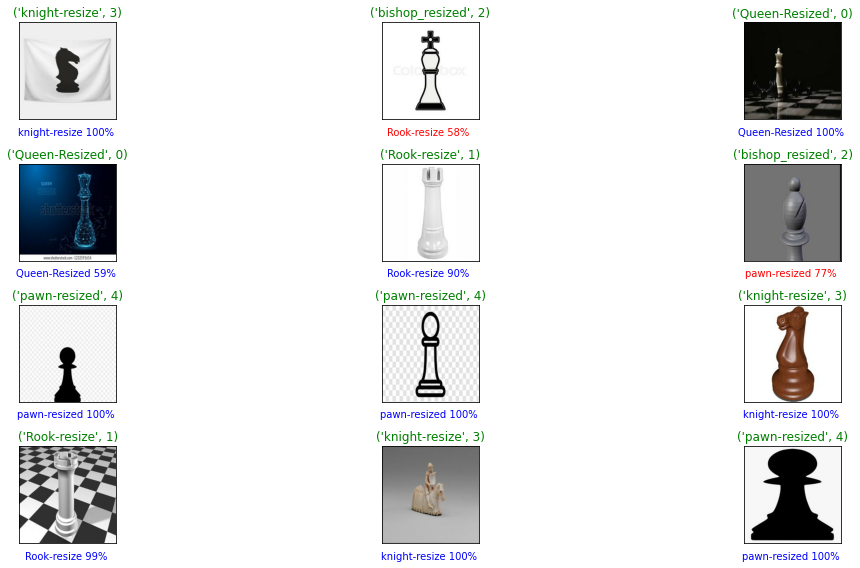

In [ ]:
images = []
true_categories = []
for i in test_ds.unbatch():
  images.append(i[0])
  true_categories.append(tf.argmax(i[1]))
y_pred=mobilenet_model.predict(tf.convert_to_tensor(images))
class_names = test_data.class_names
indices = random.sample(range(len(images)), 12)
num_rows = 4
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(6*num_cols, 2*num_rows))
for i,index in enumerate(indices):
  plt.subplot(num_rows, num_cols, i+1)
  plot_image(y_pred[index], true_categories[index], images[index])

plt.tight_layout()
plt.show()

# ResNet50 
* ### Since resnet also contains batch norm , hence all the layers containing that have been renamed
* ###  Last 8 layers are kept trainable along with that batchnorm and dropouts are added at the end to avoid overfitting 

In [ ]:
def build_model_resnet():
    
    resnet_model = tf.keras.applications.resnet50.ResNet50(
        weights ='imagenet',
        include_top = False,
        pooling='max',
        input_shape = (224,224,3)
    )
   
    for layer in resnet_model.layers[:-8]:
         if "BatchNormalization" in layer.__class__.__name__:
                layer.trainable = True
         else:
             layer.trainable = False
    x = resnet_model.output   
#     x = tf.keras.layers.Dense(256, activation = "relu")(x) 
#     x=tf.keras.layers.BatchNormalization()(x)
#     x = tf.keras.layers.Dense(128, activation = "relu")(x)
    x=tf.keras.layers.BatchNormalization()(x)
    x=tf.keras.layers.Dropout(0.35)(x)
    output = tf.keras.layers.Dense(5, activation = 'softmax')(x)
    pretrained_model = tf.keras.Model(inputs = resnet_model.input, outputs = output)
    return pretrained_model

In [ ]:
finetuned_resnet = build_model_resnet()

94781440/94765736 [==============================] - 0s 0us/step


In [ ]:
finetuned_resnet.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_9[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
checkpoint_cb_resnet = tf.keras.callbacks.ModelCheckpoint("resnet_model.h5", save_best_only=True)

In [ ]:
finetuned_resnet.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss="categorical_crossentropy",
  metrics=METRICS,
  )
history_resnet = finetuned_resnet.fit(
  train_ds,
  epochs = 100,
  validation_data = val_ds,
  callbacks=[checkpoint_cb_resnet,lr_scheduler]
  )

Epoch 1/100
397/397 [==============================] - 20s 39ms/step - loss: 1.8572 - categorical_accuracy: 0.4716 - precision: 0.5084 - recall: 0.4297 - auc: 0.7620 - val_loss: 2.2492 - val_categorical_accuracy: 0.3369 - val_precision: 0.3545 - val_recall: 0.2796 - val_auc: 0.6323


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/100
397/397 [==============================] - 15s 37ms/step - loss: 1.2842 - categorical_accuracy: 0.5977 - precision: 0.6218 - recall: 0.5599 - auc: 0.8616 - val_loss: 1.5430 - val_categorical_accuracy: 0.5735 - val_precision: 0.6071 - val_recall: 0.5484 - val_auc: 0.8371
Epoch 3/100
397/397 [==============================] - 14s 36ms/step - loss: 1.1266 - categorical_accuracy: 0.6450 - precision: 0.6745 - recall: 0.6154 - auc: 0.8870 - val_loss: 1.1156 - val_categorical_accuracy: 0.7097 - val_precision: 0.7148 - val_recall: 0.6918 - val_auc: 0.9023
Epoch 4/100
397/397 [==============================] - 14s 36ms/step - loss: 1.0363 - categorical_accuracy: 0.6961 - precision: 0.7285 - recall: 0.6683 - auc: 0.9027 - val_loss: 1.0634 - val_categorical_accuracy: 0.6774 - val_precision: 0.7160 - val_recall: 0.6595 - val_auc: 0.9133
Epoch 5/100
397/397 [==============================] - 15s 37ms/step - loss: 0.9728 - categorical_accuracy: 0.7074 - precision: 0.7247 - recall: 0.6772

# Training Inferences

* ### We see that most of the curves are getting smoothen during the training and loss curve is having few spikes even though it is getting converged slowly towards 0 .
* ### Number of epochs needs to be increased for the training 
* ### Also the number of trainable parameters should be reduced a bit more 
* ### Model is having good recall, auc, precision and acuracy values

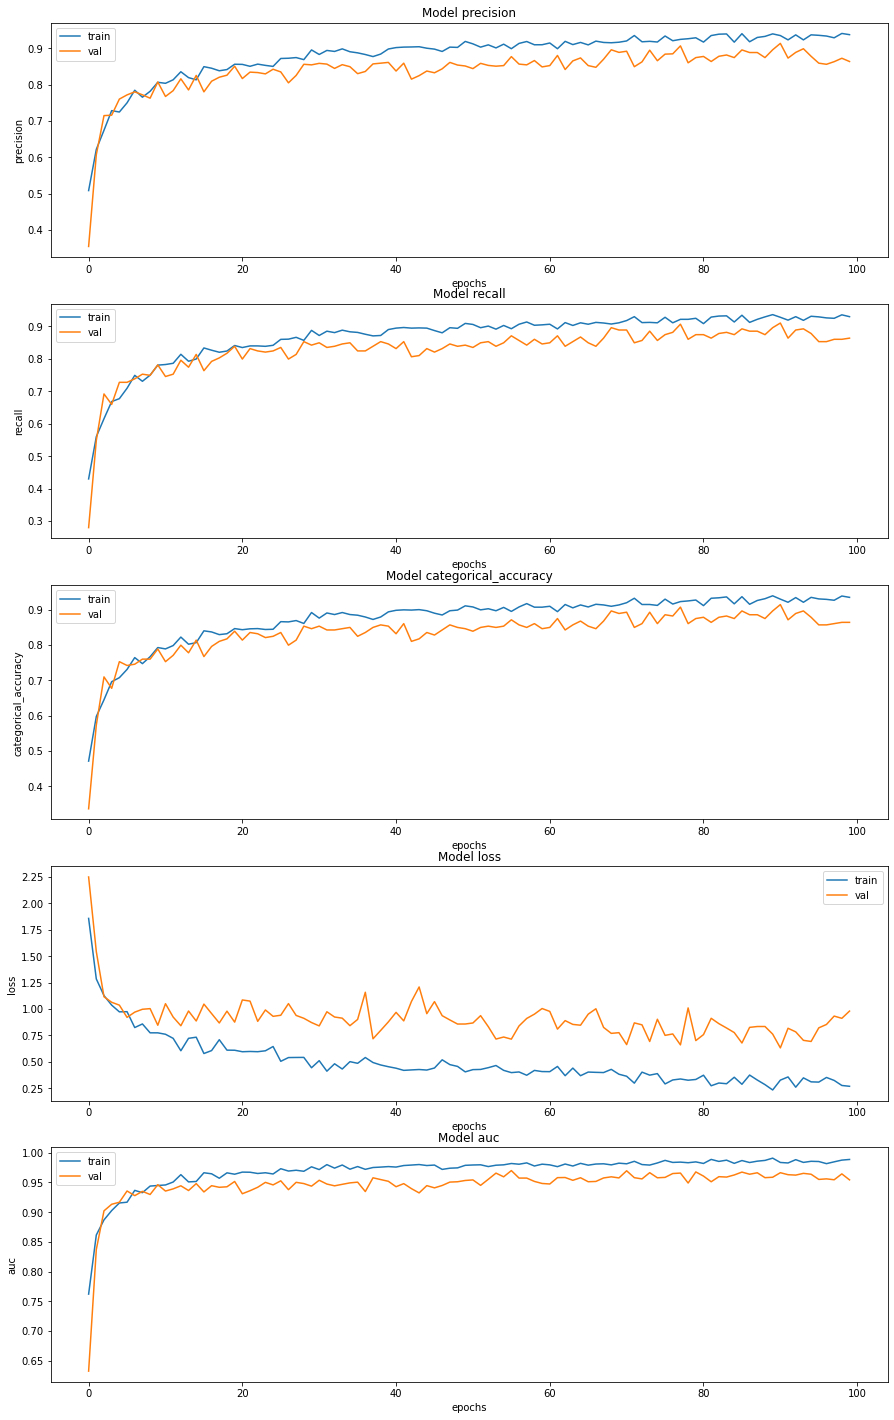

In [ ]:
fig, ax = plt.subplots(5, 1, figsize=(15, 25))
ax = ax.ravel()

for i, met in enumerate(["precision", "recall", "categorical_accuracy", "loss",'auc']):
    ax[i].plot(history_resnet.history[met])
    ax[i].plot(history_resnet.history["val_" + met])
    ax[i].set_title("Model {}".format(met))
    ax[i].set_xlabel("epochs")
    ax[i].set_ylabel(met)
    ax[i].legend(["train", "val"])

In [ ]:
finetuned_resnet.evaluate(test_ds,return_dict=True)

9/9 [==============================] - 0s 18ms/step - loss: 0.9458 - categorical_accuracy: 0.9167 - precision: 0.9167 - recall: 0.9167 - auc: 0.9637


{'loss': 0.9458324909210205,
 'categorical_accuracy': 0.9166666865348816,
 'precision': 0.9166666865348816,
 'recall': 0.9166666865348816,
 'auc': 0.9637345671653748}

In [ ]:
resnet_model=tf.keras.models.load_model('./resnet_model.h5')

In [ ]:
resnet_model.evaluate(test_ds,return_dict=True)

9/9 [==============================] - 1s 16ms/step - loss: 0.8391 - categorical_accuracy: 0.8611 - precision: 0.8611 - recall: 0.8611 - auc: 0.9616


{'loss': 0.8391053080558777,
 'categorical_accuracy': 0.8611111044883728,
 'precision': 0.8611111044883728,
 'recall': 0.8611111044883728,
 'auc': 0.9616127014160156}

## Model Prediction on random test images for RESNET

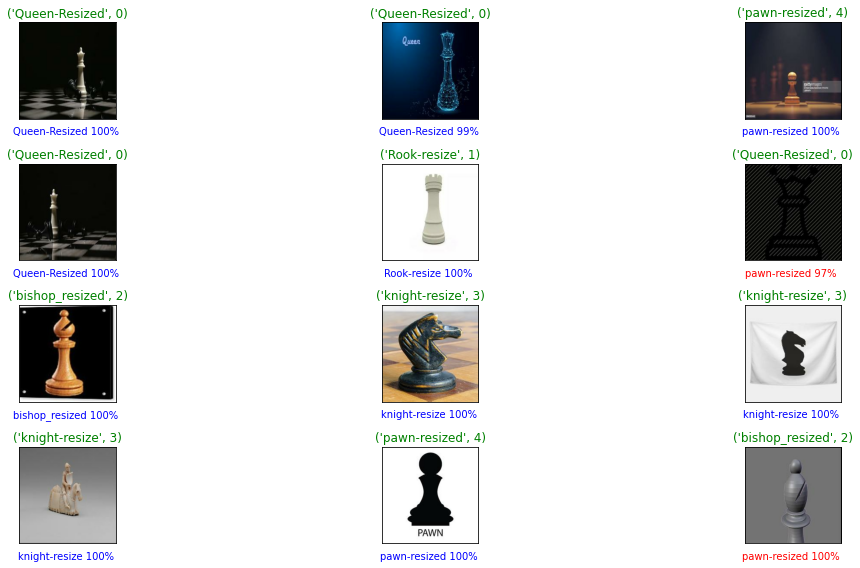

In [ ]:
images = []
true_categories = []
for i in test_ds.unbatch():
  images.append(i[0])
  true_categories.append(tf.argmax(i[1]))
y_pred=resnet_model.predict(tf.convert_to_tensor(images))
class_names = test_data.class_names
# Randomly sample 15 test images and plot it with their predicted labels, and the true labels.
indices = random.sample(range(len(images)), 12)
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 4
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(6*num_cols, 2*num_rows))
for i,index in enumerate(indices):
  plt.subplot(num_rows, num_cols, i+1)
  plot_image(y_pred[index], true_categories[index], images[index])

plt.tight_layout()
plt.show()

# EfficientNet B4
* ### It is one of the most recent developed model with the least number of parameters and performing overall much better compared to the other similar models 
* ### Here also all the batch norm layers were made trainable while building the model .
* ### And only last 3 layers were kept for training , the dense layer was added only because the size of the layer just after the model output is big and without this layer there was heavy chances of loosing information  as seen during the training and experimentation .

In [ ]:
def build_model_effi():
    
    efficienet_model = tf.keras.applications.EfficientNetB4(
        weights ='imagenet',
        include_top = False,
        input_shape = (224,224,3),
    )
   
    for layer in efficienet_model.layers[:-3]:
         if "BatchNormalization" in layer.__class__.__name__:
                layer.trainable = True
         else:
             layer.trainable = False
    x = efficienet_model.output   
    x = tf.keras.layers.Dense(512, activation = "relu")(x) 
    x=tf.keras.layers.BatchNormalization()(x)
    x=tf.keras.layers.GlobalAveragePooling2D()(x)
    x=tf.keras.layers.Dropout(0.5)(x)
    output = tf.keras.layers.Dense(5, activation = 'softmax')(x)
    pretrained_model = tf.keras.Model(inputs = efficienet_model.input, outputs = output)
    return pretrained_model

In [ ]:
finetuned_efficientnet = build_model_effi()

71696384/71686520 [==============================] - 0s 0us/step


In [ ]:
finetuned_efficientnet.summary()

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling_1 (Rescaling)         (None, 224, 224, 3)  0           input_10[0][0]                   
__________________________________________________________________________________________________
normalization (Normalization)   (None, 224, 224, 3)  7           rescaling_1[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization[0][0]              
____________________________________________________________________________________________

In [ ]:
checkpoint_cb_effi = tf.keras.callbacks.ModelCheckpoint("efficient_model.h5", save_best_only=True)

In [ ]:
finetuned_efficientnet.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss="categorical_crossentropy",
  metrics=METRICS,
  )
history_efficient = finetuned_efficientnet.fit(
  train_ds,
  epochs = 100,
  validation_data = val_ds,
  callbacks=[checkpoint_cb_effi,lr_scheduler]
  )

Epoch 1/100
397/397 [==============================] - 53s 97ms/step - loss: 1.2984 - categorical_accuracy: 0.4938 - precision: 0.6272 - recall: 0.3527 - auc: 0.7891 - val_loss: 1.4405 - val_categorical_accuracy: 0.3584 - val_precision: 0.5285 - val_recall: 0.2330 - val_auc: 0.7120
Epoch 2/100
397/397 [==============================] - 35s 88ms/step - loss: 0.9632 - categorical_accuracy: 0.6274 - precision: 0.7268 - recall: 0.5032 - auc: 0.8826 - val_loss: 0.8376 - val_categorical_accuracy: 0.6810 - val_precision: 0.7512 - val_recall: 0.5627 - val_auc: 0.9111
Epoch 3/100
397/397 [==============================] - 35s 88ms/step - loss: 0.8027 - categorical_accuracy: 0.7106 - precision: 0.7903 - recall: 0.6248 - auc: 0.9189 - val_loss: 0.7231 - val_categorical_accuracy: 0.7276 - val_precision: 0.8384 - val_recall: 0.6882 - val_auc: 0.9344
Epoch 4/100
397/397 [==============================] - 35s 87ms/step - loss: 0.6993 - categorical_accuracy: 0.7516 - precision: 0.8263 - recall: 0.6810

# Inferences 
* ### As expected the model is performing overall better compared to most of the other models
* ### All the curves of this model have almost smoothen out
* ### Loss curve is showing few spikes which can indicate that the epochs to train should be increased and also the trainable parameters can be reduced a bit more . 


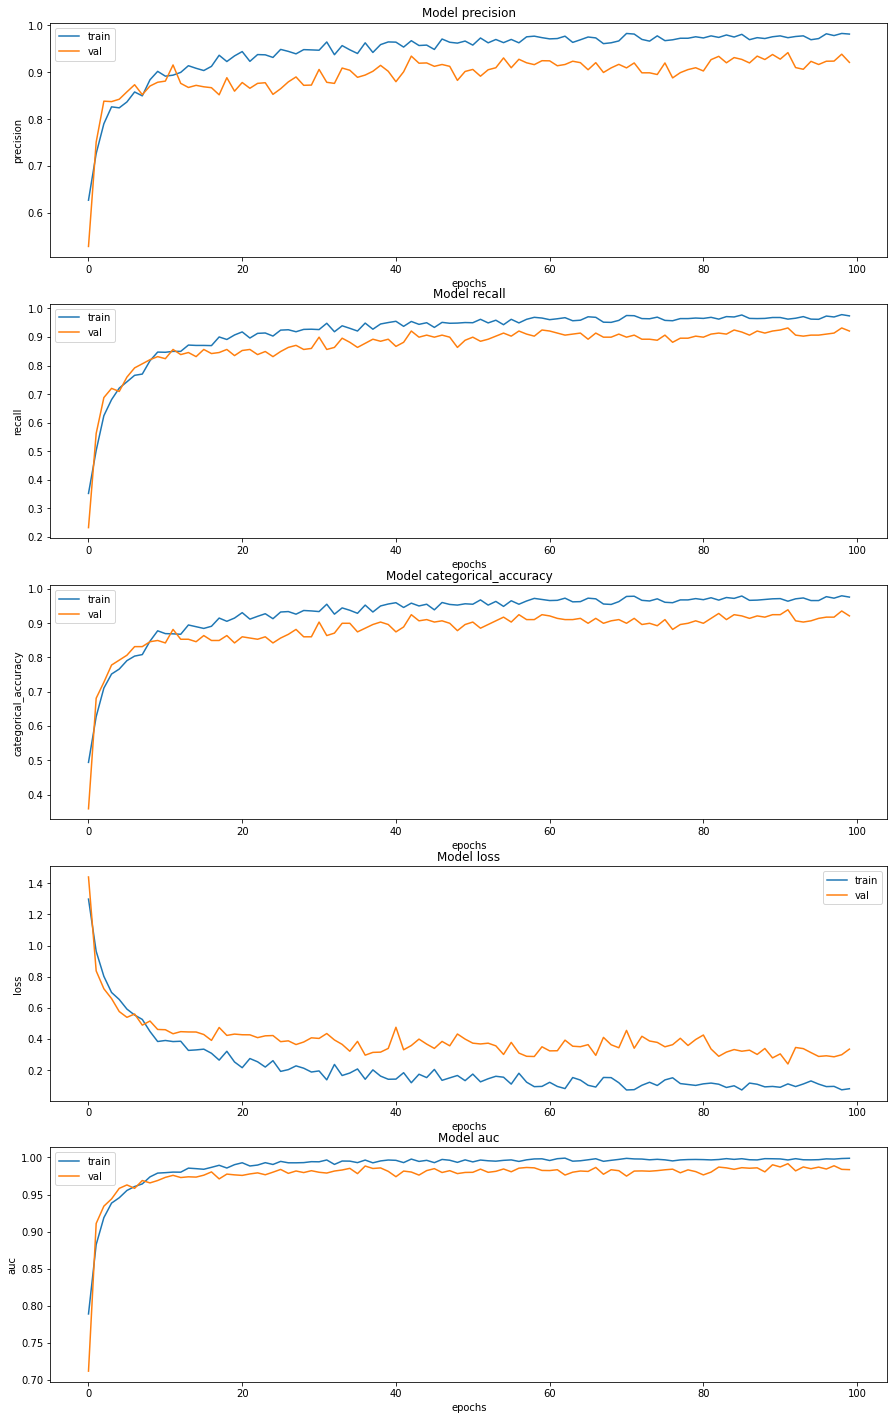

In [ ]:
fig, ax = plt.subplots(5, 1, figsize=(15, 25))
ax = ax.ravel()

for i, met in enumerate(["precision", "recall", "categorical_accuracy", "loss",'auc']):
    ax[i].plot(history_efficient.history[met])
    ax[i].plot(history_efficient.history["val_" + met])
    ax[i].set_title("Model {}".format(met))
    ax[i].set_xlabel("epochs")
    ax[i].set_ylabel(met)
    ax[i].legend(["train", "val"])

In [ ]:
finetuned_efficientnet.evaluate(test_ds,return_dict=True)

9/9 [==============================] - 0s 32ms/step - loss: 0.5242 - categorical_accuracy: 0.8889 - precision: 0.9118 - recall: 0.8611 - auc: 0.9570


{'loss': 0.5242125988006592,
 'categorical_accuracy': 0.8888888955116272,
 'precision': 0.9117646813392639,
 'recall': 0.8611111044883728,
 'auc': 0.9569829702377319}

## Model Prediction on random test images for EFFICIENT NET B4

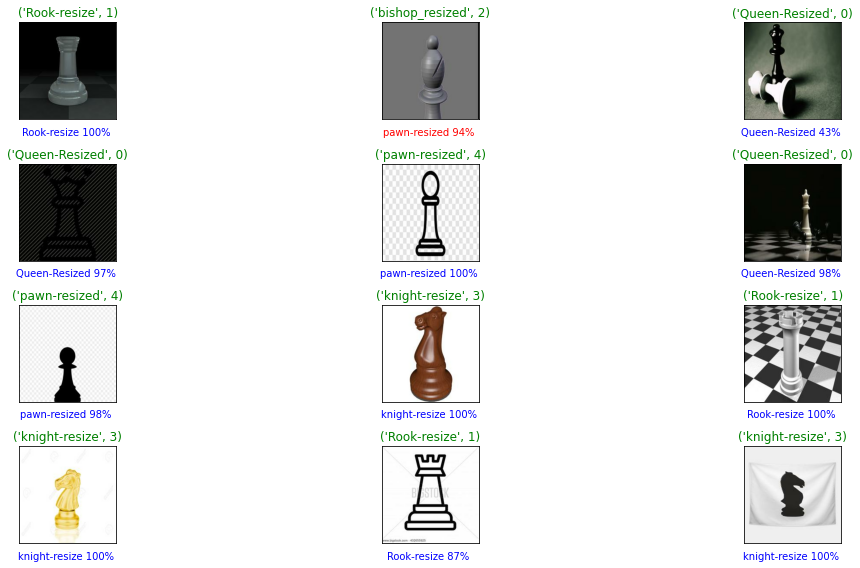

In [ ]:
images = []
true_categories = []
for i in test_ds.unbatch():
  images.append(i[0])
  true_categories.append(tf.argmax(i[1]))
y_pred=finetuned_efficientnet.predict(tf.convert_to_tensor(images))
class_names = test_data.class_names
# Randomly sample 15 test images and plot it with their predicted labels, and the true labels.
indices = random.sample(range(len(images)), 12)
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 4
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(6*num_cols, 2*num_rows))
for i,index in enumerate(indices):
  plt.subplot(num_rows, num_cols, i+1)
  plot_image(y_pred[index], true_categories[index], images[index])

plt.tight_layout()
plt.show()

## Overall Comparison of All Models 

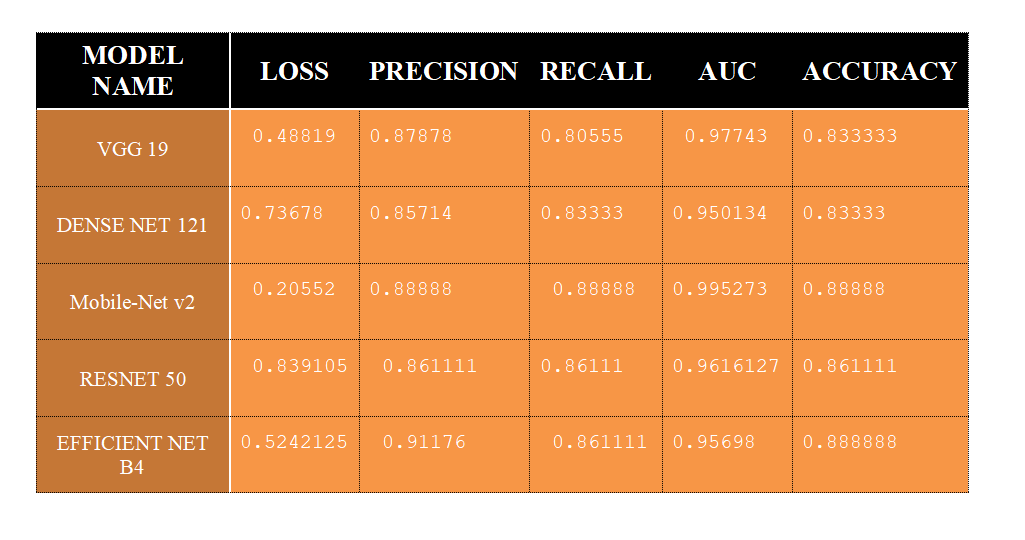

## Hence from the above tabular data we get to see that mobile net has overall less and performance better than the other networks for the given dataset 